In [12]:
import pandas as pd
from pyxlsb import open_workbook, convert_date
import matplotlib.pyplot as plt 
import seaborn as sns 

file_path = '../data/ecommerce_sales.xlsb'
sheet_name = '20210614 Ecommerce sales'



In [2]:
def read_xlsb(file_path, sheet_name):
    data = []
    with open_workbook(file_path) as wb:
        with wb.get_sheet(sheet_name) as sheet:
            for idx,row in enumerate(sheet.rows()):
                if idx == 0:
                    data.append([item.v for item in row])
                else:
                    data.append([item.v if item.c != 5 else convert_date(item.v) for item in row ])
    df = pd.DataFrame(data[1:], columns=data[0])
    return df

In [3]:
df = read_xlsb(file_path, sheet_name)

df.head()

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
0,182210782.0,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-20,244.0,4.0,6.67,10.0
1,182082437.0,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-17,28.0,1.0,9.92,10.0
2,182095765.0,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-18,15.0,1.0,9.92,10.0
3,182615392.0,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-23,385.0,2.0,20.75,10.0
4,184222081.0,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-11,61.0,1.0,19.08,10.0


In [4]:
df.describe()

,Cod_cmd,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
count,5.250340e+05,525034,525034.000000,525034.000000,525034.000000,285611.000000
mean,1.843096e+08,2021-02-12 08:57:36.544147456,237.909819,1.114495,5.699509,11.074199
min,1.301047e+08,2021-01-01 00:00:00,15.000000,1.000000,-16.670000,0.000000
25%,1.825251e+08,2021-01-23 00:00:00,57.000000,1.000000,0.000000,3.000000
50%,1.840486e+08,2021-02-09 00:00:00,155.000000,1.000000,0.000000,8.000000
75%,1.855623e+08,2021-03-05 00:00:00,318.000000,1.000000,0.000000,12.000000
max,2.111540e+08,2021-03-31 00:00:00,11858.000000,208.000000,416.670000,84.000000
std,4.228657e+06,NaN,274.712035,0.723702,14.171806,13.797036


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525034 entries, 0 to 525033
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Cod_cmd                  525034 non-null  float64       
 1   Libellé produit          525034 non-null  object        
 2   Vendeur                  525034 non-null  object        
 3   Univers                  507347 non-null  object        
 4   Nature                   513289 non-null  object        
 5   Date de commande         525034 non-null  datetime64[ns]
 6   Montant cmd              525034 non-null  float64       
 7   Quantité                 525034 non-null  float64       
 8   Prix transport           525034 non-null  float64       
 9   Délai transport annoncé  285611 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 40.1+ MB


In [6]:
#check for null values 
df.isnull().sum()

Cod_cmd                         0
Libellé produit                 0
Vendeur                         0
Univers                     17687
Nature                      11745
Date de commande                0
Montant cmd                     0
Quantité                        0
Prix transport                  0
Délai transport annoncé    239423
dtype: int64

array([[<Axes: title={'center': 'Cod_cmd'}>,
        <Axes: title={'center': 'Date de commande'}>],
       [<Axes: title={'center': 'Montant cmd'}>,
        <Axes: title={'center': 'Quantité'}>],
       [<Axes: title={'center': 'Prix transport'}>,
        <Axes: title={'center': 'Délai transport annoncé'}>]],
      dtype=object)

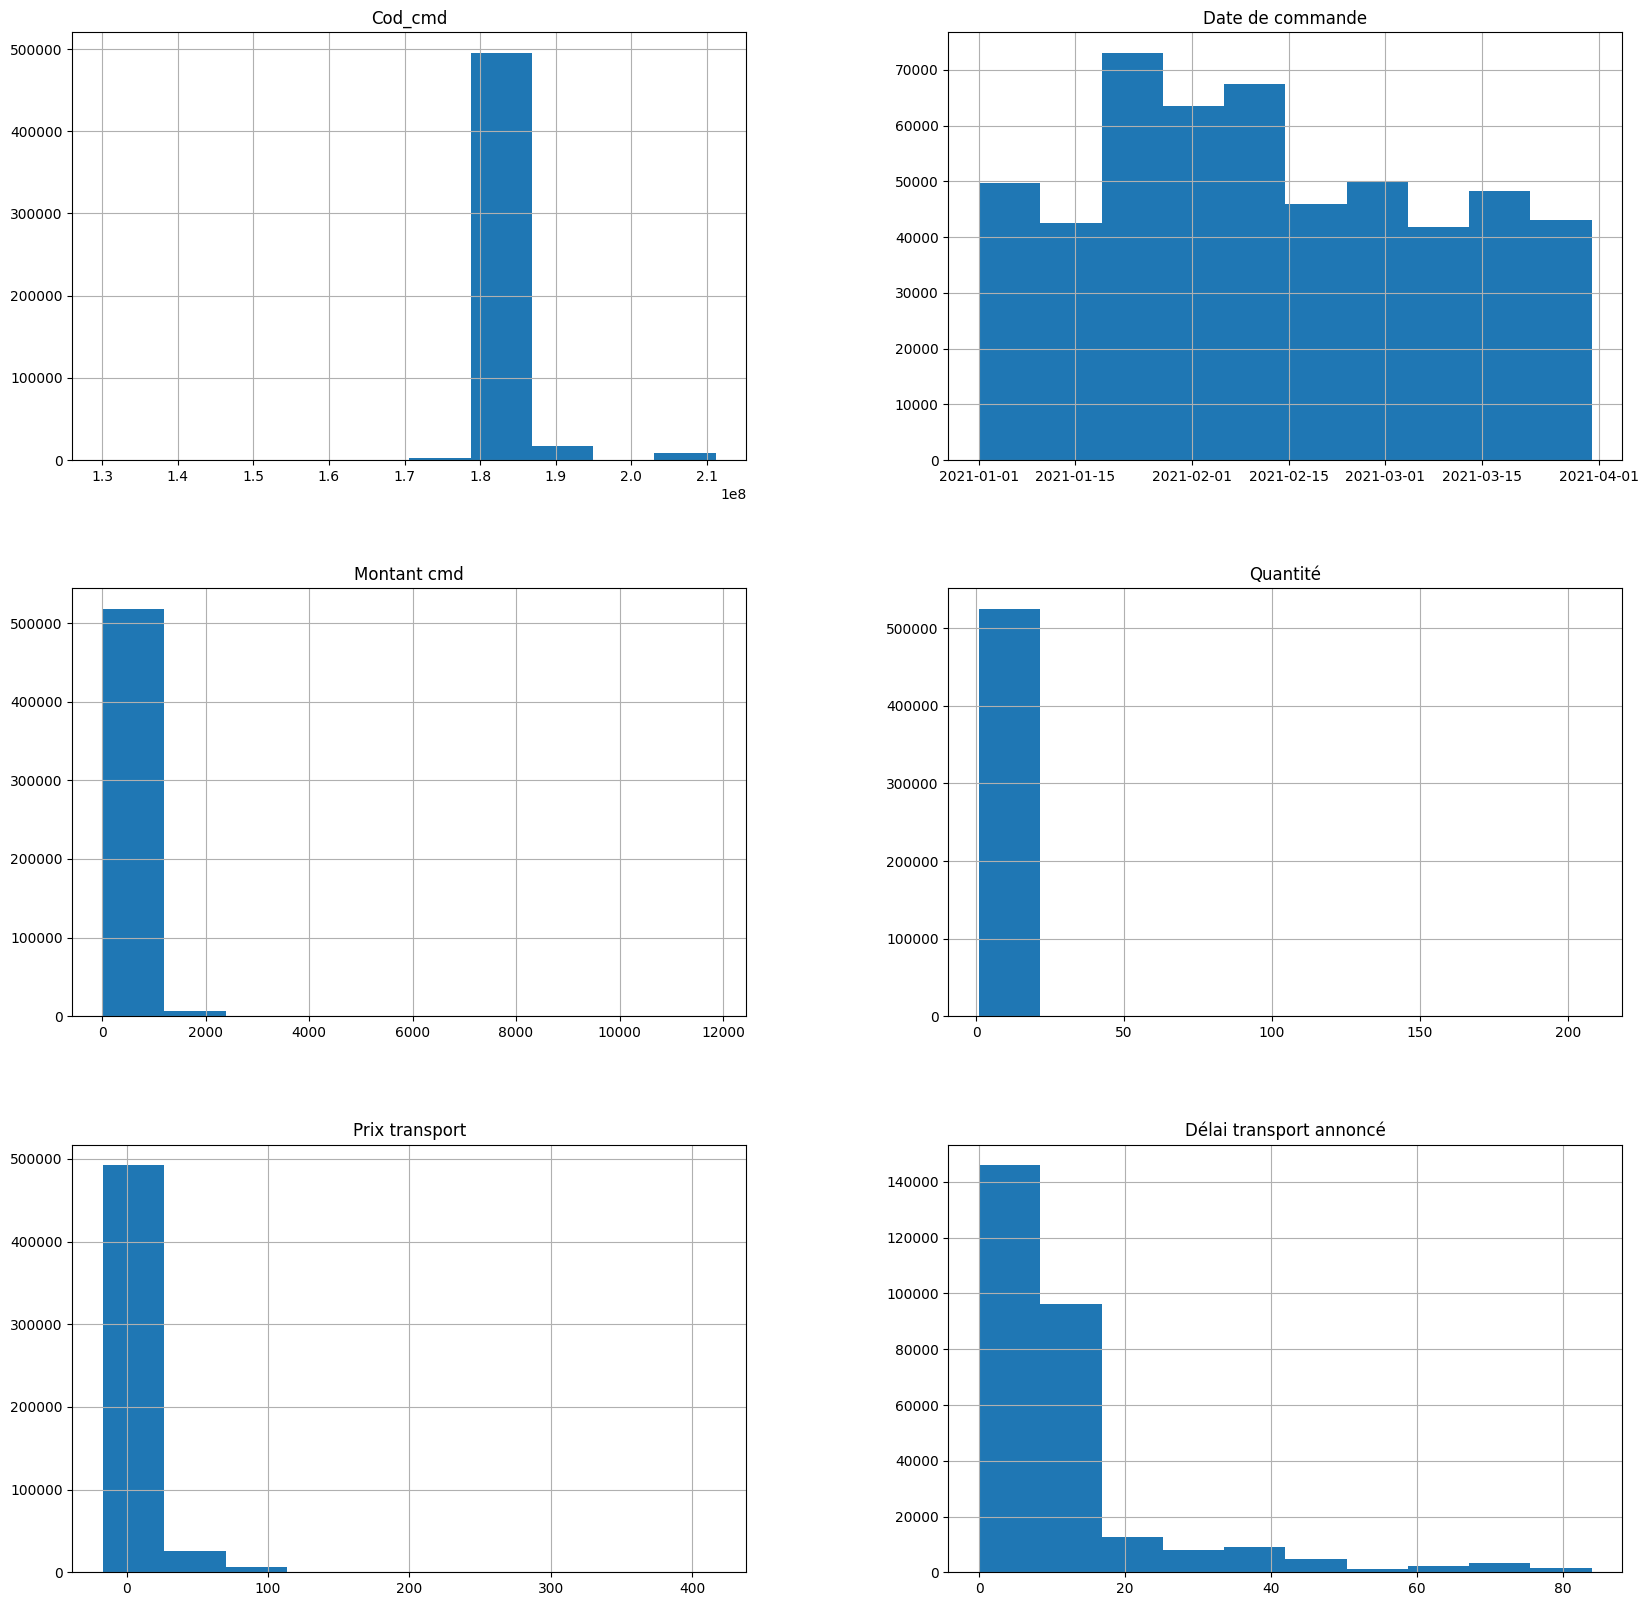

In [10]:
# plot distribution of all columns
df.hist(figsize=(20,20))

C:\Users\jatin\AppData\Local\Temp\ipykernel_12468\3730801900.py:22: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


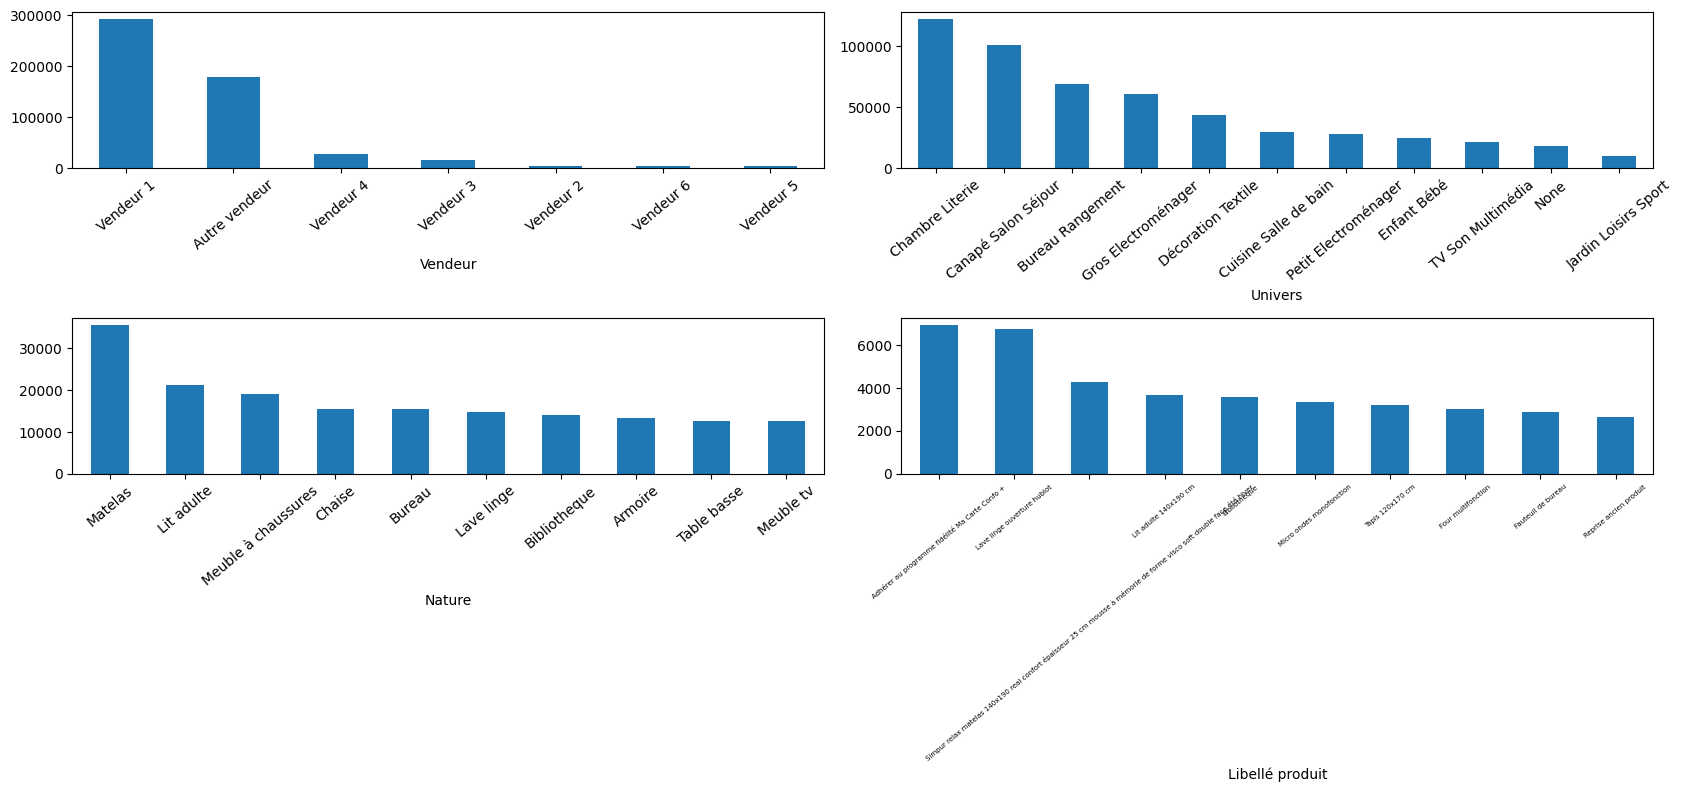

In [41]:
# plot Vendeur, Univers, Nature distribution 

fig, axs = plt.subplots(2,2, layout='constrained', figsize=(17, 8))
axs1 = axs[0][0]
df['Vendeur'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=axs1)
axs1.tick_params(axis='x', rotation=40)

axs2 = axs[0][1]
df['Univers'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=axs2)
axs2.tick_params(axis='x', rotation=40)

axs3 = axs[1][0]
df['Nature'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', ax=axs3)
axs3.tick_params(axis='x', rotation=40)


axs4 = axs[1][1]
df['Libellé produit'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', ax=axs4)
axs4.tick_params(axis='x', rotation=40, which='minor', labelsize=7)
axs4.tick_params(axis='x', rotation=40, which='major', labelsize=5)

fig.tight_layout()
plt.show()